##### Nigel K. Gondo: Data Warrior Analytics

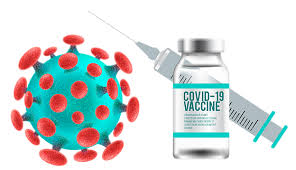

In [1]:
from PIL import Image
Image.open('vax.jpeg')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brief-Description" data-toc-modified-id="Brief-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brief Description</a></span></li><li><span><a href="#Importing-relevant-libraries" data-toc-modified-id="Importing-relevant-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing relevant libraries</a></span></li><li><span><a href="#Importing-data-and-data-wrangling" data-toc-modified-id="Importing-data-and-data-wrangling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing data and data wrangling</a></span><ul class="toc-item"><li><span><a href="#Cases-and-death-data" data-toc-modified-id="Cases-and-death-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cases and death data</a></span></li><li><span><a href="#Vaccination-data" data-toc-modified-id="Vaccination-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Vaccination data</a></span></li></ul></li><li><span><a href="#Data-visualisation-of-top-10-countries-in-terms-of-cases,-deaths-and-vaccination-Rates" data-toc-modified-id="Data-visualisation-of-top-10-countries-in-terms-of-cases,-deaths-and-vaccination-Rates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data visualisation of top 10 countries in terms of cases, deaths and vaccination Rates</a></span></li><li><span><a href="#Checking-for-outliers" data-toc-modified-id="Checking-for-outliers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Checking for outliers</a></span><ul class="toc-item"><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Boxplots</a></span></li></ul></li><li><span><a href="#Hypothesis-testing-Using-the-Pearson-Correlation" data-toc-modified-id="Hypothesis-testing-Using-the-Pearson-Correlation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hypothesis testing Using the Pearson Correlation</a></span></li><li><span><a href="#Hypothesis-testing-Using-the-Spearman-Rank-Correlation" data-toc-modified-id="Hypothesis-testing-Using-the-Spearman-Rank-Correlation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hypothesis testing Using the Spearman Rank Correlation</a></span></li><li><span><a href="#Visual-illustration-of-the-correlation" data-toc-modified-id="Visual-illustration-of-the-correlation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visual illustration of the correlation</a></span></li></ul></div>

# Brief Description

In 2021 there was a contentious debate if vaccines were effective in mitigating the effects of Covid 19. The purpose of this project was to conduct a hypothesis test to draw an inference if these vaccines managed to reduce fatalities.

# Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Importing data and data wrangling

## Cases and death data


In [3]:
#importing csv covid data
global_data = pd.read_csv('WHO COVID-19 global table data September 2nd 2021 at 2.32.54 PM.csv')
global_data.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,217558771,"2,791.17",4455323,57.16,527942,4517240,57.95,66630,0.85,7308
1,United States,Americas,38923013,"11,759.12",1106774,334.37,120560,634320,191.64,9274,2.80,744
2,India,South-East Asia,32810845,"2,377.59",298479,21.63,41965,439020,31.81,3262,0.24,460
3,Brazil,Americas,20752281,"9,763.05",168287,79.17,10466,579574,272.66,4726,2.22,266
4,Russian Federation,Europe,6937333,"4,753.73",132423,90.74,18368,184014,126.09,5591,3.83,790


In [4]:
#dropping unnecessary tables and renaming the columns that shifted when creating the data frame
global_data_new = global_data.filter(['Name',
                                      'Cases - cumulative total', 
                                      'Deaths - cumulative total',
                                      'Deaths - newly reported in last 7 days',
                                      'Cases - newly reported in last 7 days'], 
                                     axis=1)
global_data_new.head()

,Name,Cases - cumulative total,Deaths - cumulative total,Deaths - newly reported in last 7 days,Cases - newly reported in last 7 days
0,Global,217558771,4517240,66630,4455323
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423


In [5]:
#renaming the columns 
global_data_final = global_data_new.rename(columns={'Name': 'Country', 
                                                    'Cases - cumulative total':'Cumulative Cases',
                                                    'Deaths - cumulative total':'Cumulative Deaths',
                                                    'Deaths - newly reported in last 7 days': 'New Deaths in the last 7 days',
                                                    'Cases - newly reported in last 7 days':'New Cases in the last 7 days'})

global_data_final.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
0,Global,217558771,4517240,66630,4455323
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423


In [6]:
#deleting rows that have recorded zero cases  - Only want to deal with countries that have cases
global_data_final_2 = global_data_final[(global_data_new.T != 0).any()]
global_data_final_2.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
0,Global,217558771,4517240,66630,4455323
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423


In [7]:
#removing the Global row 
global_data_final_2 = global_data_final_2.drop(index = global_data_final_2.index[0], 
                                               axis=0)
global_data_final_2.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days
1,United States,38923013,634320,9274,1106774
2,India,32810845,439020,3262,298479
3,Brazil,20752281,579574,4726,168287
4,Russian Federation,6937333,184014,5591,132423
5,The United Kingdom,6789585,132535,681,234381


In [8]:
#Adding new calulated columns 'Death Rate Cumulative' and 'Death Rate last 7 days' 
global_data_final_2['Death Rate - Cumulative'] = \
global_data_final_2['Cumulative Deaths']/global_data_final_2['Cumulative Cases']
    
global_data_final_2['Death Rate last 7 days'] = \
global_data_final_2['New Deaths in the last 7 days']/global_data_final_2['New Cases in the last 7 days']
    
global_data_final_2.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days
1,United States,38923013,634320,9274,1106774,0.02,0.01
2,India,32810845,439020,3262,298479,0.01,0.01
3,Brazil,20752281,579574,4726,168287,0.03,0.03
4,Russian Federation,6937333,184014,5591,132423,0.03,0.04
5,The United Kingdom,6789585,132535,681,234381,0.02,0.00


## Vaccination data

In [9]:
#importing vaccination csv data
vaccination_data = pd.read_csv('vaccination-data.csv')
vaccination_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,20/8/2021,"1,201,286.00","770,542.00",3.09,1.98,"430,744.00",1.11,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2.5,Pfizer BioNTech - Comirnaty,SII - Covishield",22/2/2021,4.00
1,Albania,ALB,EURO,OWID,27/8/2021,"1,427,977.00","812,555.00",49.62,28.23,"615,422.00",21.39,"AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty, Sinovac - CoronaVac, Gamaleya - Sputnik V",NaN,4.00
2,Algeria,DZA,AFRO,REPORTING,23/8/2021,"4,146,091.00","3,421,279.00",9.46,7.80,"724,812.00",1.65,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V,SII - Covishield",30/1/2021,3.00
3,American Samoa,ASM,WPRO,REPORTING,20/8/2021,"54,425.00","29,993.00",98.60,54.34,"24,977.00",45.25,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfizer BioNTech - Comirnaty",21/12/2020,3.00
4,Andorra,AND,EURO,OWID,15/8/2021,"91,660.00","51,044.00",118.63,66.06,"40,616.00",52.57,"AstraZeneca - AZD1222, Pfizer BioNTech - Comirnaty",NaN,2.00


In [10]:
#Removig unncessary columns
vaccination_data_cleaned = vaccination_data.filter(['COUNTRY',
                                                    'PERSONS_FULLY_VACCINATED_PER100'], 
                                                   axis=1)
vaccination_data_cleaned.head()

,COUNTRY,PERSONS_FULLY_VACCINATED_PER100
0,Afghanistan,1.11
1,Albania,21.39
2,Algeria,1.65
3,American Samoa,45.25
4,Andorra,52.57


In [11]:
#renaming columns
vaccination_data_cleaned = \
vaccination_data_cleaned.rename(columns={'COUNTRY':'Country', 
                                         'PERSONS_FULLY_VACCINATED_PER100':'Fully Vaccinated per 100'})

vaccination_data_cleaned.head()

,Country,Fully Vaccinated per 100
0,Afghanistan,1.11
1,Albania,21.39
2,Algeria,1.65
3,American Samoa,45.25
4,Andorra,52.57


In [12]:
#merging the two dataframes 
global_cases_deaths_vax = pd.merge(left = global_data_final_2, 
                                   right = vaccination_data_cleaned, 
                                   left_on = 'Country', 
                                   right_on = 'Country')

global_cases_deaths_vax.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days,Fully Vaccinated per 100
0,United States,38923013,634320,9274,1106774,0.02,0.01,52.18
1,India,32810845,439020,3262,298479,0.01,0.01,9.76
2,Brazil,20752281,579574,4726,168287,0.03,0.03,26.01
3,Russian Federation,6937333,184014,5591,132423,0.03,0.04,24.71
4,The United Kingdom,6789585,132535,681,234381,0.02,0.00,61.59


In [13]:
#Checking if there are Null values
global_cases_deaths_vax.isnull().values.any()

True

In [14]:
#Removing rows with null values so as to work with a clean and complete dataframe
global_cases_deaths_vax = global_cases_deaths_vax.dropna(how = 'any',
                                                         axis = 0)

global_cases_deaths_vax.head()

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days,Fully Vaccinated per 100
0,United States,38923013,634320,9274,1106774,0.02,0.01,52.18
1,India,32810845,439020,3262,298479,0.01,0.01,9.76
2,Brazil,20752281,579574,4726,168287,0.03,0.03,26.01
3,Russian Federation,6937333,184014,5591,132423,0.03,0.04,24.71
4,The United Kingdom,6789585,132535,681,234381,0.02,0.00,61.59


In [15]:
#Double Checking for null values
global_cases_deaths_vax.isnull().values.any()

False

In [16]:
#removing rows with an infs error
global_cases_deaths_vax = global_cases_deaths_vax.drop(126, 
                                                       axis=0)
global_cases_deaths_vax

#saving as a csv copy
global_cases_deaths_vax.to_csv('Global Covid data.csv')

In [17]:
global_cases_deaths_vax

,Country,Cumulative Cases,Cumulative Deaths,New Deaths in the last 7 days,New Cases in the last 7 days,Death Rate - Cumulative,Death Rate last 7 days,Fully Vaccinated per 100
0,United States,38923013,634320,9274,1106774,0.02,0.01,52.18
1,India,32810845,439020,3262,298479,0.01,0.01,9.76
2,Brazil,20752281,579574,4726,168287,0.03,0.03,26.01
3,Russian Federation,6937333,184014,5591,132423,0.03,0.04,24.71
4,The United Kingdom,6789585,132535,681,234381,0.02,0.00,61.59
...,...,...,...,...,...,...,...,...
200,Northern Mariana Islands (Commonwealth of the),243,2,0,14,0.01,0.00,56.14
201,Anguilla,217,0,0,51,0.00,0.00,59.76
202,New Caledonia,136,0,0,1,0.00,0.00,22.08
204,Montserrat,29,1,0,4,0.03,0.00,27.36


# Data visualisation of top 10 countries in terms of cases, deaths and vaccination Rates

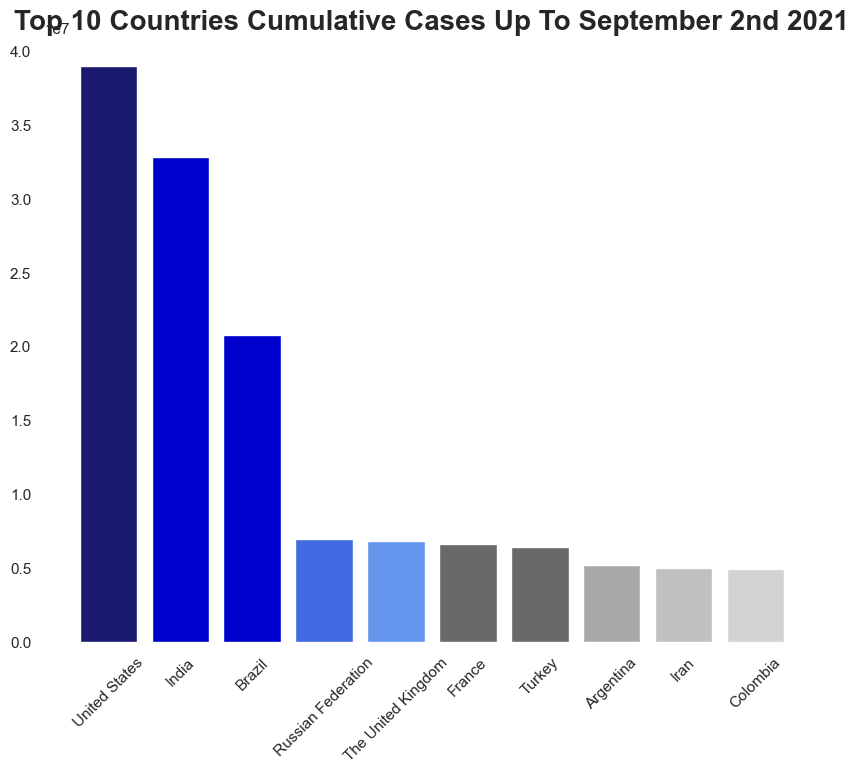

In [18]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest cumulative cases
global_cases_deaths_vax_sorted_desc_cases = global_cases_deaths_vax.sort_values('Cumulative Cases', 
                                                                                ascending = False)
global_cases_deaths_vax_sorted_desc_cases = global_cases_deaths_vax_sorted_desc_cases.iloc[:10]

#plotting cumulative cases
ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_cases['Country'], 
        global_cases_deaths_vax_sorted_desc_cases['Cumulative Cases'],
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Countries Cumulative Cases Up To September 2nd 2021', 
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

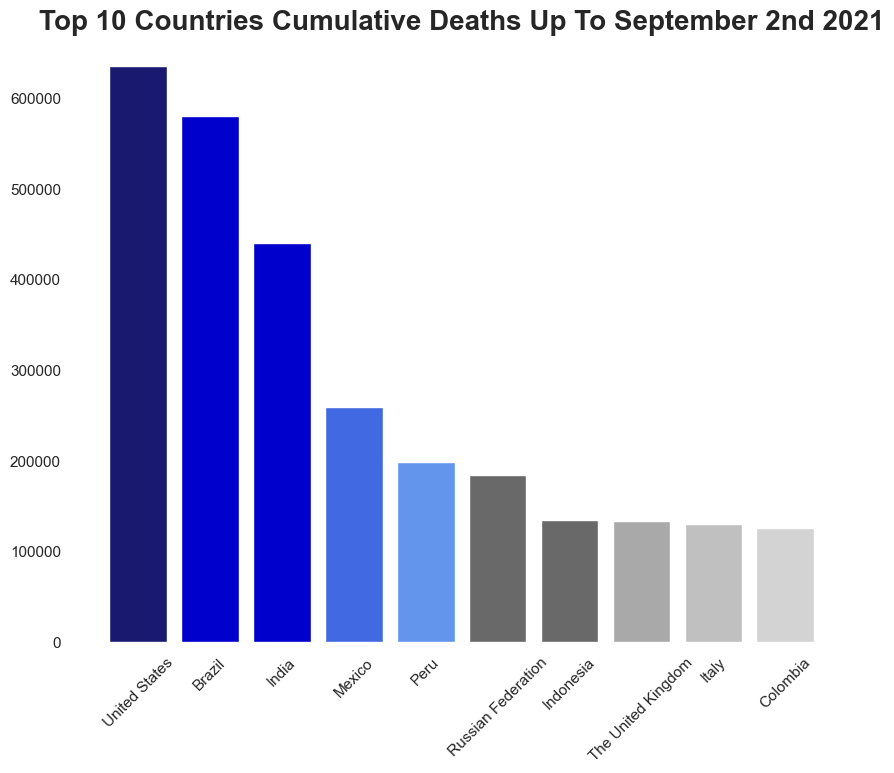

In [19]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest cumulative deaths
global_cases_deaths_vax_sorted_desc_deaths = global_cases_deaths_vax.sort_values('Cumulative Deaths', 
                                                                                 ascending = False)

global_cases_deaths_vax_sorted_desc_deaths = global_cases_deaths_vax_sorted_desc_deaths.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_deaths['Country'], 
        global_cases_deaths_vax_sorted_desc_deaths['Cumulative Deaths'], 
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Countries Cumulative Deaths Up To September 2nd 2021', 
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

The USA, Brazil and India are among the most populous nations in the world, therefore, it is not surprising in this pandemic they have experienced a high number of cases and fatalities.

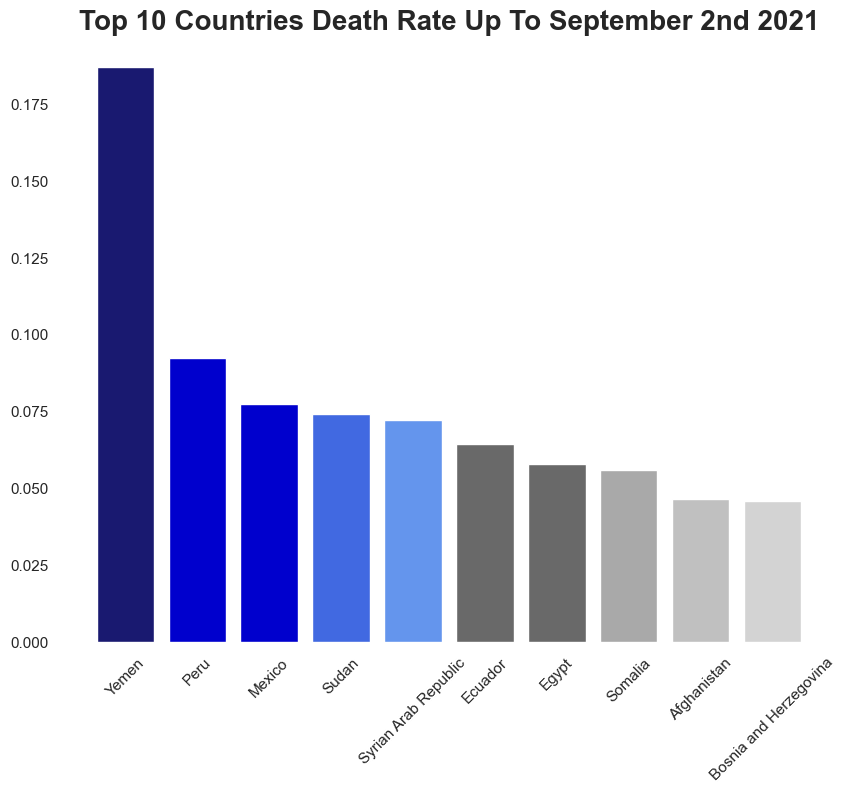

In [20]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest death rate
global_cases_deaths_vax_sorted_desc_death_rate = global_cases_deaths_vax.sort_values('Death Rate - Cumulative', 
                                                                                     ascending = False)

global_cases_deaths_vax_sorted_desc_death_rate = global_cases_deaths_vax_sorted_desc_death_rate.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_death_rate['Country'], 
        global_cases_deaths_vax_sorted_desc_death_rate['Death Rate - Cumulative'], 
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Countries Death Rate Up To September 2nd 2021',
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

On the other hand, when it comes to the death rate Yemen is ranking first. Yemen is a country that is facing a humanitarian crisis as it is plagued by conflict, poverty and poor health care. Hence why it is not surprising it has a high rate of fatalities.

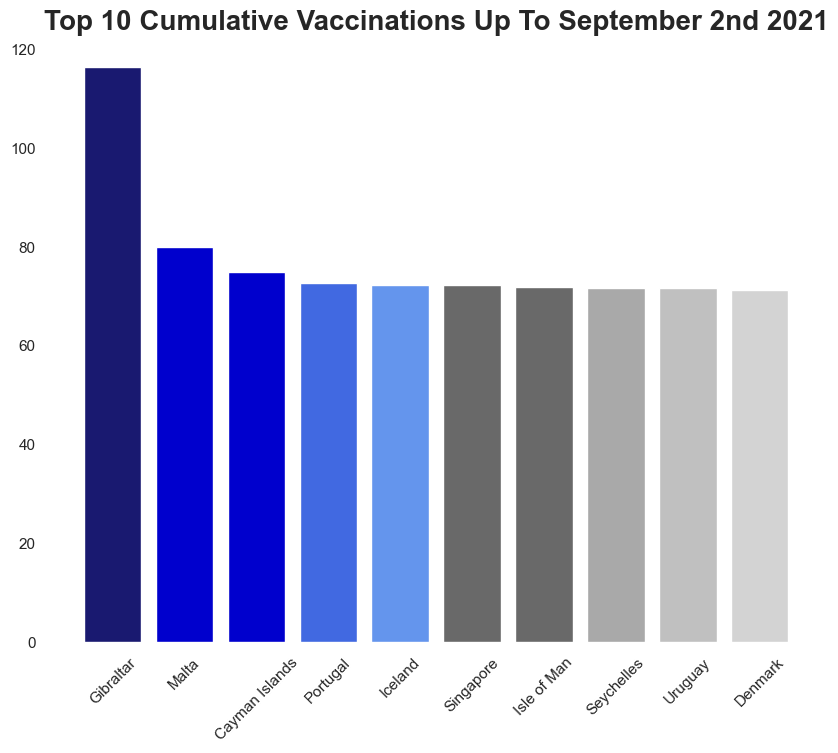

In [21]:
#Sorting the data in descending order then slicing to get the 10 countries with the highest vaccination rate
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax.sort_values('Fully Vaccinated per 100',
                                                                              ascending = False)
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax_sorted_desc_vax.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_vax['Country'], 
        global_cases_deaths_vax_sorted_desc_vax['Fully Vaccinated per 100'], 
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Cumulative Vaccinations Up To September 2nd 2021', 
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

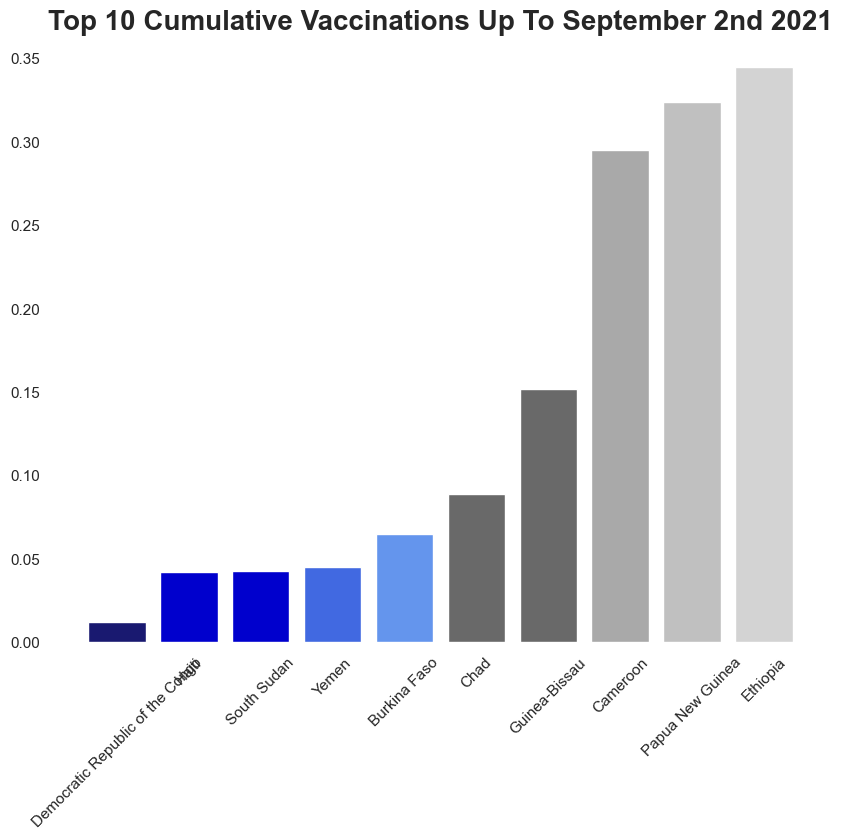

In [22]:
#Sorting the data in descending order then slicing to get the 10 countries with the lowest vaccination rate
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax.sort_values('Fully Vaccinated per 100',
                                                                              ascending = True)
global_cases_deaths_vax_sorted_desc_vax = global_cases_deaths_vax_sorted_desc_vax.iloc[:10]

ax = plt.gca()

plt.bar(global_cases_deaths_vax_sorted_desc_vax['Country'], 
        global_cases_deaths_vax_sorted_desc_vax['Fully Vaccinated per 100'], 
        color = ['midnightblue',
                 'mediumblue',
                 'mediumblue',
                 'royalblue', 
                 'cornflowerblue', 
                 'dimgrey', 
                 'dimgrey',
                 'darkgrey', 
                 'silver', 
                 'lightgrey'])

plt.xticks(rotation = 45)

plt.title('Top 10 Cumulative Vaccinations Up To September 2nd 2021', 
          fontweight = 'bold', 
          fontsize = 20)

ax.set_frame_on(False)

plt.show()

# Checking for outliers

In [23]:
#creating new data frame with the columns I need
global_cases_deaths_vax_2 = global_cases_deaths_vax[['Fully Vaccinated per 100', 
                                                     'Death Rate - Cumulative']]
global_cases_deaths_vax_2.head()

,Fully Vaccinated per 100,Death Rate - Cumulative
0,52.18,0.02
1,9.76,0.01
2,26.01,0.03
3,24.71,0.03
4,61.59,0.02


## Boxplots

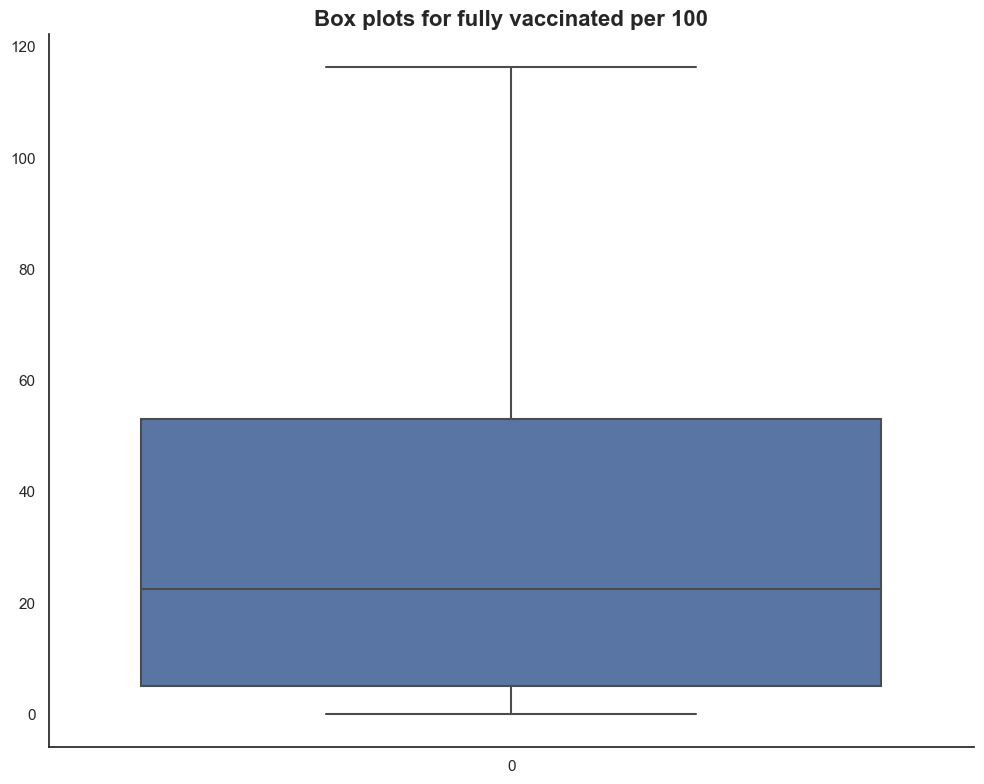

In [24]:
fig, ax = plt.subplots()

sns.boxplot(data= global_cases_deaths_vax_2['Fully Vaccinated per 100'])

plt.title('Box plots for fully vaccinated per 100', 
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

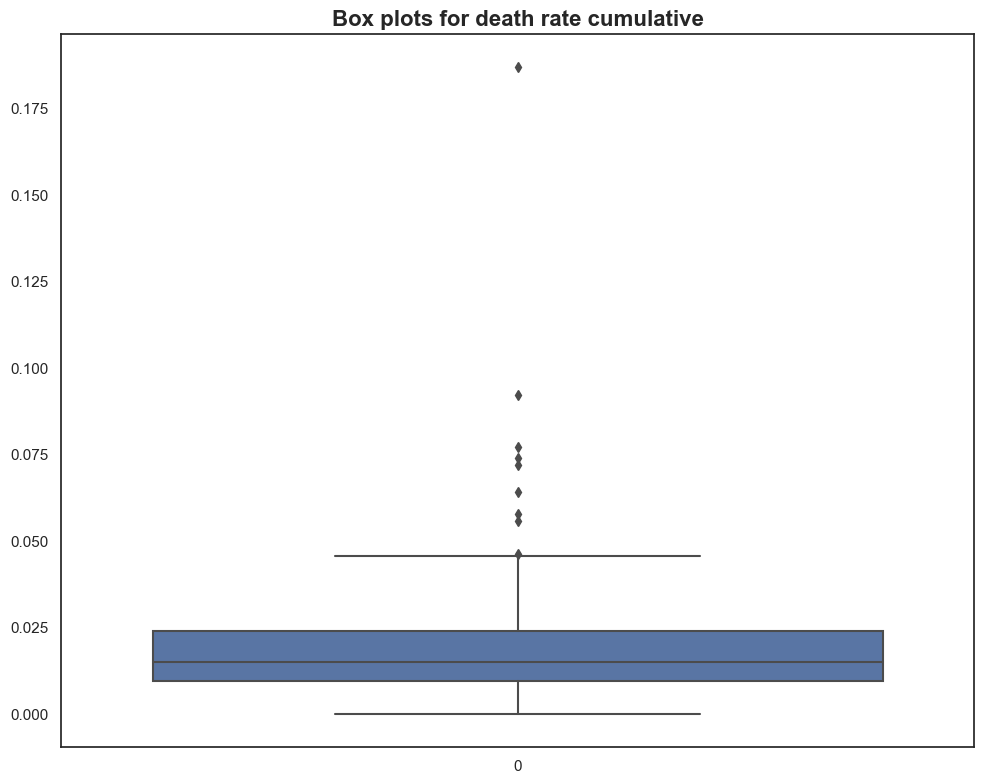

In [25]:
sns.boxplot(data= global_cases_deaths_vax_2['Death Rate - Cumulative'])

plt.title('Box plots for death rate cumulative', 
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

In [26]:
#Removing outliers using the interquatile range
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(global_cases_deaths_vax_2, 
                        'Death Rate - Cumulative')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  0.046141888025046776
Lower Whisker:  -0.012404681891214377


In [27]:
#Viewing the annual income outliers
global_cases_deaths_vax_2[(global_cases_deaths_vax_2['Death Rate - Cumulative'] < lower)\
                          | (global_cases_deaths_vax_2['Death Rate - Cumulative'] > upper)]

,Fully Vaccinated per 100,Death Rate - Cumulative
14,25.04,0.08
18,23.39,0.09
50,42.70,0.06
75,3.05,0.06
94,1.11,0.05
127,0.42,0.07
135,1.15,0.07
143,0.60,0.06
167,0.04,0.19


In [28]:
#Creating new dataframe without outliers
global_cases_deaths_vax_no_outliers = \
global_cases_deaths_vax_2[(global_cases_deaths_vax_2['Death Rate - Cumulative'] > lower) & \
                                        (global_cases_deaths_vax_2['Death Rate - Cumulative'] < upper)]

print('Number of records before outliers are removed:' + str(len(global_cases_deaths_vax_2)))
print('Number of records after outliers are removed:' + str(len(global_cases_deaths_vax_no_outliers))) 

Number of records before outliers are removed:195
Number of records after outliers are removed:186


# Hypothesis testing Using the Pearson Correlation


**What is Pearson Correlation**

This is a measure of linear correlation between two data sets.

Its the ratio between covariance of two variables and the product of their standard deviation.

**Stating the Null and Alternative Hypothesis**

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rates do lead to lower death rates

In [29]:
#creating variables for vax data and date rate data
vax_data = list(global_cases_deaths_vax_no_outliers['Fully Vaccinated per 100'])

death_rate_data = list(global_cases_deaths_vax_no_outliers['Death Rate - Cumulative'])

In [30]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate cumulative
stat, p = pearsonr(vax_data, death_rate_data)
print('stat=%.5f, p=%.5f' % (stat, p))

print('*At the 5% level of significance*')
if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')
 
    
print('______________________________________')
print('*At the 1% level of significance*')
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.33257, p=0.00000
*At the 5% level of significance*
Probably the two data samples are dependent & we reject HO
______________________________________
*At the 1% level of significance*
Probably the two data samples are dependent & we reject HO


**Comments on results**

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore, both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people are vaccinated against covid-19 the fewer fatalities are likely to occur.

# Hypothesis testing Using the Spearman Rank Correlation

**What is Spearman Rank Correlation**

This is to measure the monotonic relationship between two variable.


**Stating the Null and Alternative Hypothesis**

H0: High vaccination rates do not lead to lower death rates

H1: High vaccination rates do lead to lower death rates

In [31]:
#Testing at the 95% confidence interval and at the 99% confidence interval
# linear relationship between vaccinate rate and death rate cumulative
stat, p = spearmanr(vax_data, death_rate_data)
print('stat=%.5f, p=%.5f' % (stat, p))

print('*At the 5% level of significance*')
if p > 0.05:
    print('Probably the two data samples are independent & we fail to reject HO')
else:
    print('Probably the two data samples are dependent & we reject H0')

    
print('______________________________________')
print('*At the 1% level of significance*')    
if p > 0.01:
    print('Probably the two data samples are independent & we fail to reject HO ')
else:
    print('Probably the two data samples are dependent & we reject HO')

stat=-0.31309, p=0.00001
*At the 5% level of significance*
Probably the two data samples are dependent & we reject H0
______________________________________
*At the 1% level of significance*
Probably the two data samples are dependent & we reject HO


**Comments on results**

At both the 5% and 1% levels of significance, we accept the alternative hypothesis and reject the null hypothesis. Therefore, both at the 95% and 99% confidence interval there is reasonable statistical evidence to believe that the more people are vaccinated against covid-19 the fewer fatalities are likely to occur.

**However, the R-squared of both the person and spearman correlation is weak with an average of about -0.33**

# Visual illustration of the correlation

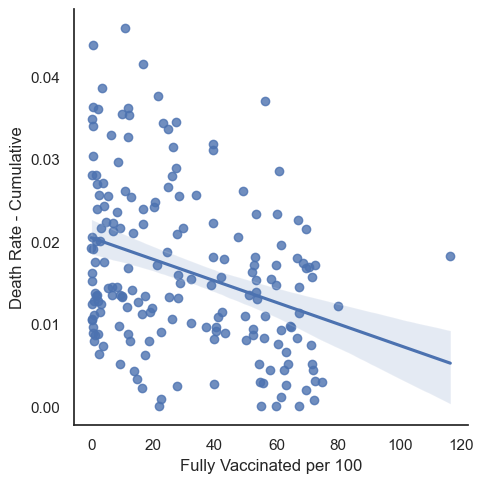

<Figure size 2000x1500 with 0 Axes>

In [32]:
sns.lmplot(x = 'Fully Vaccinated per 100', 
           y = 'Death Rate - Cumulative', 
           data = global_cases_deaths_vax_no_outliers)

plt.figure(figsize = (20,15))

plt.show()

(2.5, -0.5)

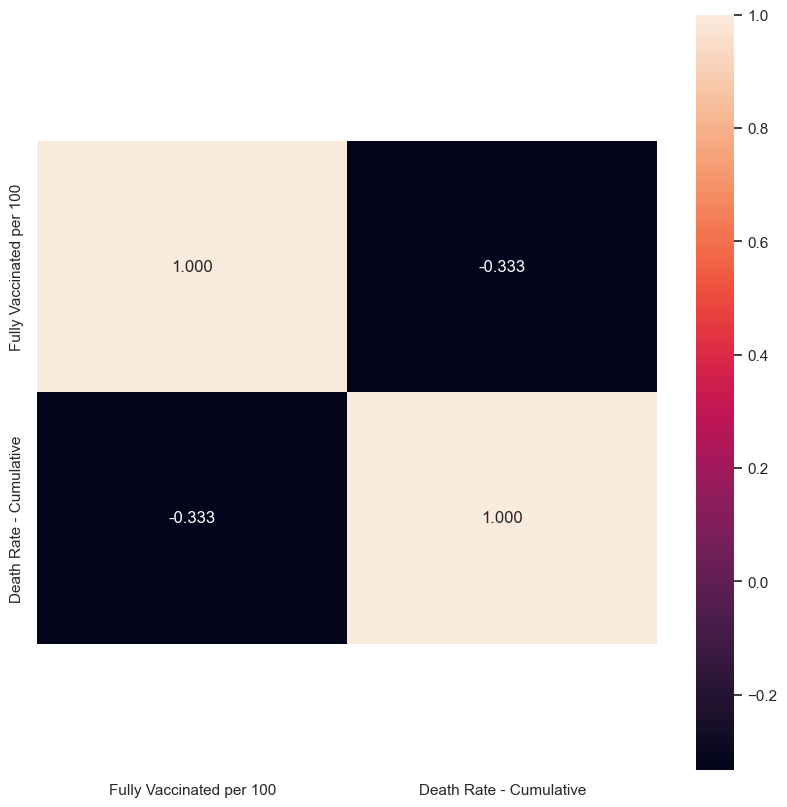

In [33]:
#Correlation using heatmap
global_cases_deaths_vax_3 = global_cases_deaths_vax_no_outliers[['Fully Vaccinated per 100', 
                                                     'Death Rate - Cumulative']]


plt.figure(figsize = (10,10))

ax = sns.heatmap(global_cases_deaths_vax_3.corr(), 
                 annot = True, 
                 fmt = '.3f')

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)